# 1.0 Common Commands

## 1.1 Mount drive

In [ ]:
#Mount Google Drive to acess data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.2 Install packages

In [ ]:
#Install required packages
!pip install lime
!pip install pycaret
!pip install --upgrade pycaret
!pip install shap

     |████████████████████████████████| 275 kB 5.5 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=48625e249e8da2085c28dd396fb6b3fe1f24ddfe246cf531018eb0689de10a4e
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime
     |████████████████████████████████| 301 kB 5.2 MB/s 
     |████████████████████████████████| 261 kB 30.1 MB/s 
     |████████████████████████████████| 1.3 MB 40.3 MB/s 
     |████████████████████████████████| 86 kB 4.6 MB/s 
     |████████████████████████████████| 167 kB 35.6 MB/s 
     |████████████████████████████████| 114 kB 48.0 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 15.6 MB 22.1 MB/s 
     |████████████████████████████████| 2.0 MB 37.2 MB/s 
     |████████████████████████████████| 1.7 MB 45.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done

## 1.3 Import libraries

In [ ]:
#Import all required libraries. Some reduntant libraries may be found which were 
#used during experimentation.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from lime.lime_tabular import LimeTabularExplainer

from pycaret.classification import *
from pycaret.utils import enable_colab 
enable_colab()

import re

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

Colab mode enabled.


## 1.4 Import data

In [ ]:
#Function named dataframe_optimizer is defined. This will reduce space consumption by dataframes.
#Credit - https://www.kaggle.com/rinnqd/reduce-memory-usage and 
#https://www.analyticsvidhya.com/blog/2021/04/how-to-reduce-memory-usage-in-python-pandas/
def dataframe_optimizer(df):
  '''This is a dataframe optimizer'''
  start_mem=np.round(df.memory_usage().sum()/1024**2,2)    
  for col in df.columns:
    col_type=df[col].dtype        
    if col_type!=object:
      c_min=df[col].min()
      c_max=df[col].max()
      if str(col_type)[:3]=='int':
        if c_min>np.iinfo(np.int8).min and c_max<np.iinfo(np.int8).max:
            df[col]=df[col].astype(np.int8)
        elif c_min>np.iinfo(np.int16).min and c_max<np.iinfo(np.int16).max:
            df[col]=df[col].astype(np.int16)
        elif c_min>np.iinfo(np.int32).min and c_max<np.iinfo(np.int32).max:
            df[col]=df[col].astype(np.int32)
        elif c_min>np.iinfo(np.int64).min and c_max<np.iinfo(np.int64).max:
            df[col]=df[col].astype(np.int64)  
      else:
        if c_min>np.finfo(np.float16).min and c_max<np.finfo(np.float16).max:
            df[col]=df[col].astype(np.float16)
        elif c_min>np.finfo(np.float32).min and c_max<np.finfo(np.float32).max:
            df[col]=df[col].astype(np.float32)
        else:
            df[col]=df[col].astype(np.float64)
  end_mem=np.round(df.memory_usage().sum()/1024**2,2)
  return df

All the relevant files can be accessed through the following link: https://drive.google.com/drive/folders/1evFZRwFWh4zkR9CiT46llB9PlaXFLfLA?usp=sharing

In [ ]:
#Import data

#Read X_train_final_feature_selected
X_train_feature_selected = dataframe_optimizer(pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/X_train_final_feature_selected.csv'))

#Read y_train_final_feature_selected
y_train_feature_selected = dataframe_optimizer(pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/y_train_final_feature_selected.csv'))

#Read X_test_final_feature_selected
X_test_feature_selected = dataframe_optimizer(pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/X_test_final_feature_selected.csv'))

#Read y_test_final_feature_selected
y_test_feature_selected = dataframe_optimizer(pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/y_test_final_feature_selected.csv'))

#Read predict_test
predict_test = dataframe_optimizer(pd.read_csv('/content/drive/MyDrive/AI_ML_Project/Data/predict_test.csv'))

In [ ]:
#Print the shape of imported data
print(X_train_feature_selected.shape)
print(y_train_feature_selected.shape)
print(X_test_feature_selected.shape)
print(y_test_feature_selected.shape)
print(predict_test.shape)

(204494, 176)
(204494, 1)
(46127, 176)
(46127, 1)
(46127, 179)


# 2.0 PCA

## 2.1 Data Preparation

In [ ]:
#Prepare data frame of correctly predicted data points
predict_test_without_labels = predict_test.drop(columns=['TARGET', 'Label', 'Score'])

## 2.2 PCA with 5 features

In [ ]:
#Define PCA analyser
pca = PCA(n_components=5, random_state=42)
#Fit PCA analyser to data and transform
predict_test_without_labels_PCA = pca.fit_transform(predict_test_without_labels)

In [ ]:
#Convert PCA features to data frame
predict_test_without_labels_PCA_df = pd.DataFrame(predict_test_without_labels_PCA, 
                                                  columns=['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5'])

In [ ]:
#Add TARGET, LABEL and Score from predict_test (data set with predictions from lightgbm from phase 3) 
#to predict_test_PCA (copy of data frame with PCA features) 
predict_test_PCA = predict_test_without_labels_PCA_df
predict_test_PCA['TARGET'] = predict_test['TARGET']
predict_test_PCA['Label'] = predict_test['Label']
predict_test_PCA['Score'] = predict_test['Score']

In [ ]:
#Add new column PRED to predict_test_PCA to indicate correct and wrong predictions
predict_test_PCA['PRED'] = np.where(predict_test_PCA['Label'] == predict_test_PCA['TARGET'], 'Correct', 'Wrong')

In [ ]:
#Add new column TYPE to indicate coorrect or wrong predictions with predicted label
conditions = [(predict_test_PCA['Label'] == 0) & (predict_test_PCA['TARGET'] == 0), 
              (predict_test_PCA['Label'] == 0) & (predict_test_PCA['TARGET'] != 0), 
              (predict_test_PCA['Label'] == 1) & (predict_test_PCA['TARGET'] == 1), 
              (predict_test_PCA['Label'] == 1) & (predict_test_PCA['TARGET'] != 1)]
values = ['Correct_0', 'Wrong_0', 'Correct_1', 'Wrong_1']
predict_test_PCA['TYPE'] = np.select(conditions, values)

In [ ]:
#Visualise prepared data (predict_test_PCA) 
predict_test_PCA

PCA_1     PCA_2     PCA_3     PCA_4     PCA_5  TARGET  Label  \
0     -0.209067 -0.215435 -0.055012 -2.110336  1.819279       0      0   
1     -0.592355  0.220897 -0.049107  4.366656  1.733112       1      0   
2     -0.811488  1.378064 -0.129424  0.816070  0.098646       0      0   
3     -0.528224  0.290019 -0.074503 -0.069695 -1.369410       0      0   
4     -0.700191  1.389497 -0.100734 -1.512738 -0.169575       0      0   
...         ...       ...       ...       ...       ...     ...    ...   
46122  1.132460 -6.799003  0.383555  1.144528  1.499903       0      0   
46123 -0.511724  0.411148 -0.043587 -0.833651 -0.770652       0      0   
46124 -0.960438  2.456582 -0.239177 -0.126670  2.895933       0      0   
46125 -0.925650  1.866706 -0.128450  0.367610 -0.649871       0      0   
46126 -0.343592 -0.448144 -0.004841  2.400511  0.805485       0      0   

          Score     PRED       TYPE  
0      0.916992  Correct  Correct_0  
1      0.989258    Wrong    Wrong_0  
2      0.981934  Correct  Correct_0  
3      0.878906  Correct  Correct_0  
4      0.988281  Correct  Correct_0  
...         ...      ...        ...  
46122  0.983887  Correct  Correct_0  
46123  0.991211  Correct  Correct_0  
46124  0.678223  Correct  Correct_0  
46125  0.973145  Correct  Correct_0  
46126  0.957520  Correct  Correct_0  

[46127 rows x 10 columns]

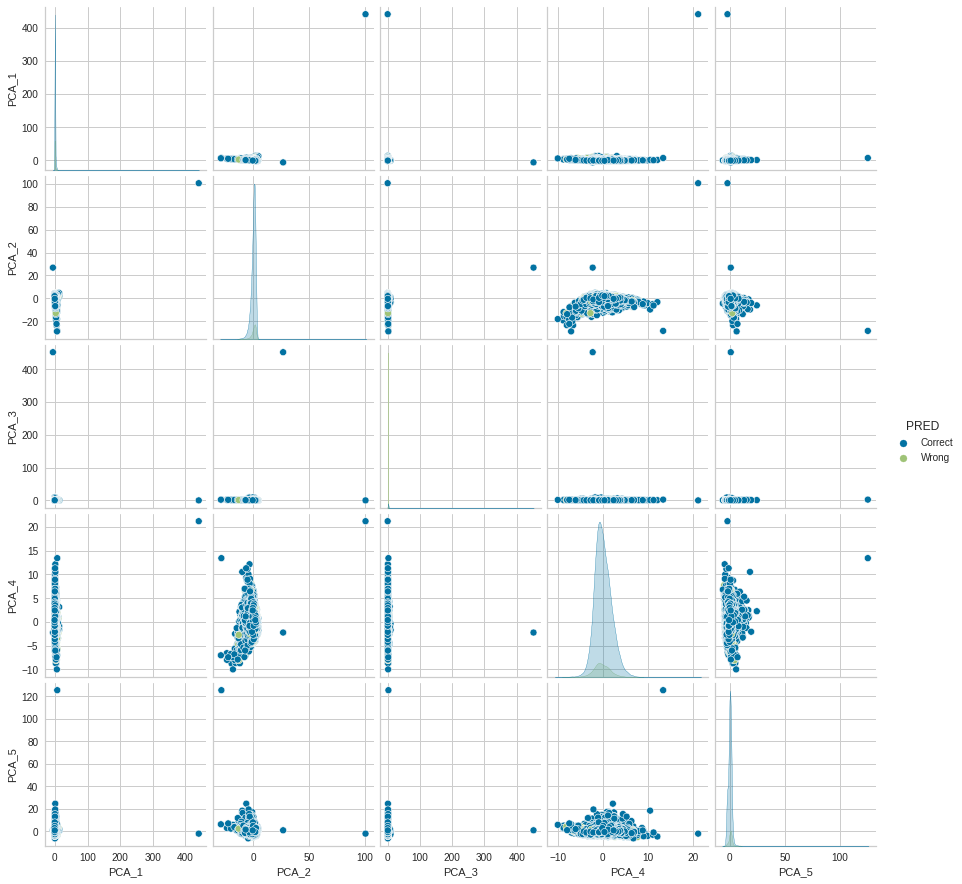

In [ ]:
#Pair plot for PCA features
sns.pairplot(predict_test_PCA.drop(columns=['TARGET', 'Label', 'Score', 'TYPE']), hue='PRED')
plt.show()

## 2.3 PCA with 2 features

In [ ]:
#Define PCA analyser
pca1 = PCA(n_components=2, random_state=42)
#Fit PCA analyser to data and transform
predict_test_without_labels_PCA1 = pca1.fit_transform(predict_test_without_labels)

In [ ]:
#Convert PCA features to data frame
predict_test_without_labels_PCA1_df = pd.DataFrame(predict_test_without_labels_PCA1, columns=['PCA_1', 'PCA_2'])

In [ ]:
#Add TARGET, LABEL and Score from predict_test (data set with predictions from lightgbm from phase 3) 
#to predict_test_PCA1 (copy of data frame with PCA features)
predict_test_PCA1 = predict_test_without_labels_PCA1_df
predict_test_PCA1['TARGET'] = predict_test['TARGET']
predict_test_PCA1['Label'] = predict_test['Label']
predict_test_PCA1['Score'] = predict_test['Score']

In [ ]:
#Add new column PRED to predict_test_PCA1 to indicate correct and wrong predictions
predict_test_PCA1['PRED'] = np.where(predict_test_PCA1['Label'] == predict_test_PCA1['TARGET'], 'Correct', 'Wrong')

In [ ]:
#Add new column TYPE to indicate coorrect or wrong predictions with predicted label
conditions = [(predict_test_PCA1['Label'] == 0) & (predict_test_PCA1['TARGET'] == 0), 
              (predict_test_PCA1['Label'] == 0) & (predict_test_PCA1['TARGET'] != 0), 
              (predict_test_PCA1['Label'] == 1) & (predict_test_PCA1['TARGET'] == 1), 
              (predict_test_PCA1['Label'] == 1) & (predict_test_PCA1['TARGET'] != 1)]
values = ['Correct_0', 'Wrong_0', 'Correct_1', 'Wrong_1']
predict_test_PCA1['TYPE'] = np.select(conditions, values)

In [ ]:
#Visualise prepared data (predict_test_PCA)
predict_test_PCA1

PCA_1     PCA_2  TARGET  Label     Score     PRED       TYPE
0     -0.209081 -0.215421       0      0  0.916992  Correct  Correct_0
1     -0.592373  0.220935       1      0  0.989258    Wrong    Wrong_0
2     -0.811517  1.378032       0      0  0.981934  Correct  Correct_0
3     -0.528214  0.290033       0      0  0.878906  Correct  Correct_0
4     -0.700219  1.389461       0      0  0.988281  Correct  Correct_0
...         ...       ...     ...    ...       ...      ...        ...
46122  1.132458 -6.798999       0      0  0.983887  Correct  Correct_0
46123 -0.511723  0.411137       0      0  0.991211  Correct  Correct_0
46124 -0.960446  2.456621       0      0  0.678223  Correct  Correct_0
46125 -0.925650  1.866706       0      0  0.973145  Correct  Correct_0
46126 -0.343602 -0.448166       0      0  0.957520  Correct  Correct_0

[46127 rows x 7 columns]

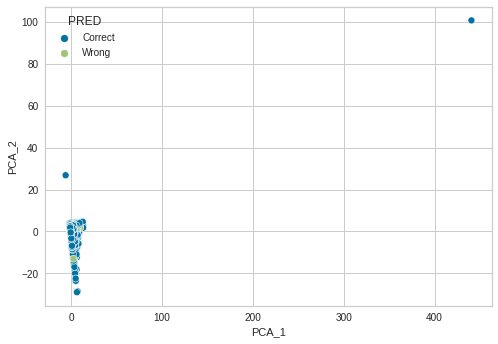

In [ ]:
#Scatter plot
sns.scatterplot(data=predict_test_PCA1, x="PCA_1", y="PCA_2", hue='PRED')
plt.show()

# 3.0 Train model with CONFIDENCE as output

## 3.1 Add confidence columns

In [ ]:
#Data preparation
X_train_feature_selected_with_target = X_train_feature_selected
X_train_feature_selected_with_target["TARGET"] = y_train_feature_selected.to_numpy().flatten()
X_test_feature_selected_with_target = X_test_feature_selected
X_test_feature_selected_with_target["TARGET"] = y_test_feature_selected.to_numpy().flatten()

In [ ]:
#Rename columns to enable pycaret to read them
X_train_feature_selected_with_target = X_train_feature_selected_with_target.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test_feature_selected_with_target = X_test_feature_selected_with_target.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [ ]:
#Setup the dataset
data_feature_selected = setup(data=X_train_feature_selected_with_target, target="TARGET", test_data=X_test_feature_selected_with_target, preprocess=False, silent=True)

Description             Value
0              session_id              3987
1                  Target            TARGET
2             Target Type            Binary
3           Label Encoded              None
4           Original Data     (204494, 177)
5          Missing Values             False
6        Numeric Features               176
7    Categorical Features                 0
8   Transformed Train Set     (204494, 176)
9    Transformed Test Set      (46127, 176)
10     Shuffle Train-Test              True
11    Stratify Train-Test             False
12         Fold Generator   StratifiedKFold
13            Fold Number                10
14               CPU Jobs                -1
15                Use GPU             False
16         Log Experiment             False
17        Experiment Name  clf-default-name
18                    USI              2ad8
19          Fix Imbalance             False
20   Fix Imbalance Method             SMOTE

At the time this code was executed, use of saved best model (best_model_auc) was throwing error. Hence, lightgbm is again trained with tuned parameters obtained in section 3.3 of phase 3 notebook.

In [ ]:
#Train lightgbm with parameters obtained after tuning (best_model_auc in section 3.3 of phase 3)
best_model = create_model('lightgbm', bagging_fraction=0.7, bagging_freq=5,
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.4,
                                 importance_type='split', learning_rate=0.05,
                                 max_depth=-1, min_child_samples=81,
                                 min_child_weight=0.001, min_split_gain=0.2,
                                 n_estimators=300, n_jobs=-1, num_leaves=200,
                                 objective=None, random_state=3067,
                                 reg_alpha=0.0005, reg_lambda=0.0005,
                                 silent='warn', subsample=1.0,
                                 subsample_for_bin=200000, subsample_freq=0)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9169  0.7662  0.0287  0.3902  0.0535  0.0427  0.0875
1       0.9187  0.7720  0.0454  0.5390  0.0838  0.0720  0.1390
2       0.9194  0.7662  0.0460  0.5923  0.0854  0.0745  0.1490
3       0.9181  0.7624  0.0335  0.4956  0.0627  0.0529  0.1125
4       0.9185  0.7657  0.0371  0.5254  0.0693  0.0591  0.1234
5       0.9182  0.7689  0.0329  0.5000  0.0617  0.0522  0.1123
6       0.9191  0.7643  0.0425  0.5680  0.0790  0.0684  0.1392
7       0.9174  0.7542  0.0275  0.4220  0.0517  0.0421  0.0909
8       0.9188  0.7589  0.0389  0.5508  0.0726  0.0625  0.1304
9       0.9186  0.7681  0.0383  0.5333  0.0714  0.0611  0.1266
Mean    0.9184  0.7647  0.0371  0.5117  0.0691  0.0588  0.1211
SD      0.0007  0.0049  0.0061  0.0598  0.0111  0.0107  0.0193

In [ ]:
#Predict on train data
predict_train = predict_model(best_model, X_train_feature_selected_with_target)
print(predict_train)

        NAME_HOUSING_TYPE_Municipalapartment  ...   Score
0                                          0  ...  0.9628
1                                          0  ...  0.9454
2                                          0  ...  0.9823
3                                          0  ...  0.9801
4                                          0  ...  0.7530
...                                      ...  ...     ...
204489                                     0  ...  0.9930
204490                                     0  ...  0.9464
204491                                     0  ...  0.9116
204492                                     0  ...  0.9868
204493                                     0  ...  0.5541

[204494 rows x 179 columns]


In [ ]:
#Add CONFIDENCE column to train data with predictions (predict_train)
conditions = [(predict_train['Label'] == predict_train['TARGET']) & (predict_train['Score'] <= 0.75), 
              (predict_train['Label'] == predict_train['TARGET']) & (predict_train['Score'] > 0.75), 
              (predict_train['Label'] != predict_train['TARGET']) & (predict_train['Score'] <= 0.75), 
              (predict_train['Label'] != predict_train['TARGET']) & (predict_train['Score'] > 0.75)]
values = ['Correct_Low', 'Correct_High', 'Wrong_Low', 'Wrong_High']
predict_train['CONFIDENCE'] = np.select(conditions, values)

In [ ]:
#Predict on test data
predict_test = predict_model(best_model, X_test_feature_selected_with_target)
print(predict_test)

       NAME_HOUSING_TYPE_Municipalapartment  ...   Score
0                                         0  ...  0.9169
1                                         0  ...  0.9894
2                                         0  ...  0.9818
3                                         0  ...  0.8791
4                                         0  ...  0.9881
...                                     ...  ...     ...
46122                                     0  ...  0.9839
46123                                     0  ...  0.9912
46124                                     0  ...  0.6782
46125                                     0  ...  0.9731
46126                                     0  ...  0.9577

[46127 rows x 179 columns]


In [ ]:
#Add CONFIDENCE column to test data with predictions (predict_test)
conditions = [(predict_test['Label'] == predict_test['TARGET']) & (predict_test['Score'] <= 0.75), 
              (predict_test['Label'] == predict_test['TARGET']) & (predict_test['Score'] > 0.75), 
              (predict_test['Label'] != predict_test['TARGET']) & (predict_test['Score'] <= 0.75), 
              (predict_test['Label'] != predict_test['TARGET']) & (predict_test['Score'] > 0.75)]
values = ['Correct_Low', 'Correct_High', 'Wrong_Low', 'Wrong_High']
predict_test['CONFIDENCE'] = np.select(conditions, values)

## 3.2 Prepare data

In [ ]:
#Prepare data
X_predict_train = predict_train.drop(columns=['TARGET', 'Label', 'Score'])
X_predict_test = predict_test.drop(columns=['TARGET', 'Label', 'Score'])

In [ ]:
#Setup the dataset
data_confidence = setup(data=X_predict_train, target="CONFIDENCE", test_data=X_predict_test, preprocess=False, silent=True)

Description                                              Value
0              session_id                                               2792
1                  Target                                         CONFIDENCE
2             Target Type                                         Multiclass
3           Label Encoded  Correct_High: 0, Correct_Low: 1, Wrong_High: 2...
4           Original Data                                      (204494, 177)
5          Missing Values                                              False
6        Numeric Features                                                176
7    Categorical Features                                                  0
8   Transformed Train Set                                      (204494, 176)
9    Transformed Test Set                                       (46127, 176)
10     Shuffle Train-Test                                               True
11    Stratify Train-Test                                              False
12         Fold Generator                                    StratifiedKFold
13            Fold Number                                                 10
14               CPU Jobs                                                 -1
15                Use GPU                                              False
16         Log Experiment                                              False
17        Experiment Name                                   clf-default-name
18                    USI                                               9ad9
19          Fix Imbalance                                              False
20   Fix Imbalance Method                                              SMOTE

## 3.3 Train model

In [ ]:
#Train lightgbm on train data with CONFIDENCE as TARGET
M2 = create_model('lightgbm')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9136  0.8107  0.3629  0.8517  0.8803  0.2464  0.3323
1       0.9136  0.8165  0.3696  0.8518  0.8807  0.2546  0.3353
2       0.9137  0.8060  0.3667  0.8519  0.8806  0.2517  0.3353
3       0.9141  0.8117  0.3649  0.8523  0.8808  0.2496  0.3377
4       0.9120  0.8165  0.3597  0.8498  0.8787  0.2347  0.3138
5       0.9143  0.8117  0.3655  0.8529  0.8810  0.2477  0.3379
6       0.9137  0.8047  0.3646  0.8519  0.8804  0.2471  0.3327
7       0.9140  0.8135  0.3690  0.8523  0.8810  0.2552  0.3383
8       0.9134  0.8103  0.3629  0.8514  0.8801  0.2448  0.3297
9       0.9137  0.8110  0.3626  0.8517  0.8804  0.2470  0.3334
Mean    0.9136  0.8113  0.3648  0.8518  0.8804  0.2479  0.3326
SD      0.0006  0.0036  0.0029  0.0008  0.0006  0.0055  0.0068

In [ ]:
#Predict on train data
M2_predict_train = predict_model(M2, X_predict_train, raw_score=True)
print(M2_predict_train)

        NAME_HOUSING_TYPE_Municipalapartment  ...  Score_Wrong_Low
0                                          0  ...           0.0230
1                                          0  ...           0.0239
2                                          0  ...           0.0178
3                                          0  ...           0.0231
4                                          0  ...           0.1140
...                                      ...  ...              ...
204489                                     0  ...           0.0025
204490                                     0  ...           0.0222
204491                                     0  ...           0.0221
204492                                     0  ...           0.0014
204493                                     0  ...           0.0628

[204494 rows x 182 columns]


In [ ]:
#Predict on test data
M2_predict_test = predict_model(M2, X_predict_test, raw_score=True)
print(M2_predict_test)

       NAME_HOUSING_TYPE_Municipalapartment  ...  Score_Wrong_Low
0                                         0  ...           0.0266
1                                         0  ...           0.0116
2                                         0  ...           0.0076
3                                         0  ...           0.0492
4                                         0  ...           0.0096
...                                     ...  ...              ...
46122                                     0  ...           0.0017
46123                                     0  ...           0.0012
46124                                     0  ...           0.2064
46125                                     0  ...           0.0089
46126                                     0  ...           0.0262

[46127 rows x 182 columns]


## 3.4 Add probability outputs as new features

In [ ]:
#Add columns for probability values for each TARGET class to train data
X_train_data3 = X_train_feature_selected_with_target
X_train_data3['Score_Wrong_Low'] = M2_predict_train['Score_Wrong_Low'].to_numpy().flatten()
X_train_data3['Score_Wrong_High'] = M2_predict_train['Score_Wrong_High'].to_numpy().flatten()
X_train_data3['Score_Correct_Low'] = M2_predict_train['Score_Correct_Low'].to_numpy().flatten()
X_train_data3['Score_Correct_High'] = M2_predict_train['Score_Correct_High'].to_numpy().flatten()

#Add columns for probability values for each TARGET class to test data
X_test_data3 = X_test_feature_selected_with_target
X_test_data3['Score_Wrong_Low'] = M2_predict_test['Score_Wrong_Low'].to_numpy().flatten()
X_test_data3['Score_Wrong_High'] = M2_predict_test['Score_Wrong_High'].to_numpy().flatten()
X_test_data3['Score_Correct_Low'] = M2_predict_test['Score_Correct_Low'].to_numpy().flatten()
X_test_data3['Score_Correct_High'] = M2_predict_test['Score_Correct_High'].to_numpy().flatten()

# 4.0 LDA and new feature

## 4.1 Perform LDA on X_train_data3 and X_test_data3

In [ ]:
#Define LDA analyser
lda = LinearDiscriminantAnalysis()
#Fit LDA analyser to X_train_data3 and transform
lda_train = lda.fit_transform(X_train_data3.drop(columns=['TARGET']).to_numpy(), X_train_data3['TARGET'].to_numpy())
#Fit LDA analyser to X_test_data3 and transform
lda_test = lda.fit_transform(X_test_data3.drop(columns=['TARGET']).to_numpy(), X_test_data3['TARGET'].to_numpy())

In [ ]:
#Add new column LDA with LDA feature to X_train_data3
X_train_data3['LDA'] = lda_train

#Add new column LDA with LDA feature to X_test_data3
X_test_data3['LDA'] = lda_test

# 5.0 Train models with new features

## 5.1 LGBM

In [ ]:
#Setup the dataset
data_lgbm = setup(data=X_train_data3, target="TARGET", test_data=X_test_data3, preprocess=False, silent=True)

Description             Value
0              session_id              2722
1                  Target            TARGET
2             Target Type            Binary
3           Label Encoded              None
4           Original Data     (204494, 182)
5          Missing Values             False
6        Numeric Features               181
7    Categorical Features                 0
8   Transformed Train Set     (204494, 181)
9    Transformed Test Set      (46127, 181)
10     Shuffle Train-Test              True
11    Stratify Train-Test             False
12         Fold Generator   StratifiedKFold
13            Fold Number                10
14               CPU Jobs                -1
15                Use GPU             False
16         Log Experiment             False
17        Experiment Name  clf-default-name
18                    USI              0972
19          Fix Imbalance             False
20   Fix Imbalance Method             SMOTE

In [ ]:
#Train model
lgbm = create_model('lightgbm')

#Tune hyperparameters of decision tree
lgbm_added_features = tune_model(lgbm)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9286  0.8966  0.2493  0.6704  0.3634  0.3339  0.3804
1       0.9289  0.8951  0.2493  0.6780  0.3645  0.3353  0.3831
2       0.9313  0.8966  0.2636  0.7194  0.3858  0.3576  0.4090
3       0.9319  0.8927  0.2684  0.7277  0.3921  0.3641  0.4157
4       0.9299  0.9010  0.2488  0.7015  0.3673  0.3390  0.3909
5       0.9320  0.9055  0.2614  0.7382  0.3860  0.3586  0.4136
6       0.9294  0.8955  0.2566  0.6820  0.3729  0.3435  0.3903
7       0.9297  0.8945  0.2548  0.6893  0.3721  0.3431  0.3914
8       0.9288  0.8924  0.2291  0.6964  0.3447  0.3171  0.3729
9       0.9296  0.8937  0.2428  0.7012  0.3607  0.3327  0.3859
Mean    0.9300  0.8964  0.2524  0.7004  0.3710  0.3425  0.3933
SD      0.0012  0.0038  0.0107  0.0210  0.0134  0.0136  0.0139

In [ ]:
#Print tuned parameter values
lgbm_added_features

LGBMClassifier(bagging_fraction=0.4, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=26, min_child_weight=0.001, min_split_gain=0,
               n_estimators=210, n_jobs=-1, num_leaves=4, objective=None,
               random_state=2722, reg_alpha=0.3, reg_lambda=0.005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
#Predict on test data
predict_test_data3 = predict_model(lgbm_added_features)
print(predict_test_data3)

Model  Accuracy    AUC  ...      F1   Kappa     MCC
0  Light Gradient Boosting Machine    0.9155  0.772  ...  0.1307  0.1062  0.1447

[1 rows x 8 columns]

       NAME_HOUSING_TYPE_Municipalapartment  ...   Score
0                                         0  ...  0.9388
1                                         0  ...  0.9941
2                                         0  ...  0.9946
3                                         0  ...  0.9359
4                                         0  ...  0.9911
...                                     ...  ...     ...
46122                                     0  ...  0.9987
46123                                     0  ...  0.9972
46124                                     0  ...  0.6988
46125                                     0  ...  0.9870
46126                                     0  ...  0.9893

[46127 rows x 184 columns]


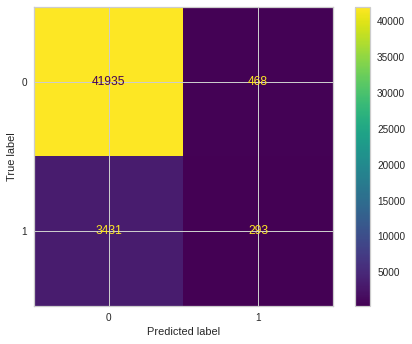

In [ ]:
#Print confusion matrix
cm_lgbm_test_data3 = confusion_matrix(X_test_data3["TARGET"], predict_test_data3["Label"])  
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm_test_data3)
disp.plot()

Observations and conclusion
* Overfitting is observed with substantial difference in accuracy & AUC values between predictions on train data and test data.
* Although AUC has increased compared to best_model, accuracy has decreased.
Based on the above observations, it is concluded that lgbm_added_features is not better than best_model. 


## 5.2 Stacked Model

In [ ]:
#Setup the dataset
data_stacking = setup(data=X_train_data3, target="TARGET", test_data=X_test_data3, preprocess=False, silent=True)

Description             Value
0              session_id              7319
1                  Target            TARGET
2             Target Type            Binary
3           Label Encoded              None
4           Original Data     (204494, 181)
5          Missing Values             False
6        Numeric Features               180
7    Categorical Features                 0
8   Transformed Train Set     (204494, 180)
9    Transformed Test Set      (46127, 180)
10     Shuffle Train-Test              True
11    Stratify Train-Test             False
12         Fold Generator   StratifiedKFold
13            Fold Number                10
14               CPU Jobs                -1
15                Use GPU             False
16         Log Experiment             False
17        Experiment Name  clf-default-name
18                    USI              0ef7
19          Fix Imbalance             False
20   Fix Imbalance Method             SMOTE

In [ ]:
# create individual models for stacking
lr = create_model('lr')
rf = create_model('rf')
lightgbm = create_model('lightgbm')

# stacking models
stacker = stack_models(estimator_list = [lr, rf, lightgbm], meta_model = lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9281  0.8899  0.2732  0.6419  0.3832  0.3516  0.3881
1       0.9305  0.8971  0.2875  0.6765  0.4035  0.3729  0.4118
2       0.9319  0.8935  0.2995  0.6949  0.4185  0.3884  0.4276
3       0.9302  0.8850  0.2947  0.6662  0.4086  0.3774  0.4132
4       0.9316  0.8915  0.3020  0.6861  0.4194  0.3889  0.4262
5       0.9319  0.8949  0.2967  0.6966  0.4161  0.3861  0.4262
6       0.9313  0.8935  0.3098  0.6745  0.4246  0.3934  0.4273
7       0.9297  0.8849  0.2907  0.6594  0.4035  0.3721  0.4076
8       0.9315  0.8912  0.2883  0.6955  0.4076  0.3778  0.4195
9       0.9299  0.8924  0.2739  0.6755  0.3898  0.3596  0.4013
Mean    0.9307  0.8914  0.2916  0.6767  0.4075  0.3768  0.4149
SD      0.0012  0.0037  0.0110  0.0167  0.0125  0.0127  0.0125

In [ ]:
#Predict on test data
predict_stack_test_data3 = predict_model(stacker)
print(predict_stack_test_data3)

Model  Accuracy     AUC  ...      F1   Kappa     MCC
0  Stacking Classifier    0.9078  0.7429  ...  0.1389  0.1033  0.1217

[1 rows x 8 columns]

       NAME_HOUSING_TYPE_Municipalapartment  ...   Score
0                                         0  ...  0.9830
1                                         0  ...  0.9830
2                                         0  ...  0.9744
3                                         0  ...  0.9632
4                                         0  ...  0.9854
...                                     ...  ...     ...
46122                                     0  ...  0.9880
46123                                     0  ...  0.9913
46124                                     0  ...  0.6027
46125                                     0  ...  0.9867
46126                                     0  ...  0.9803

[46127 rows x 183 columns]


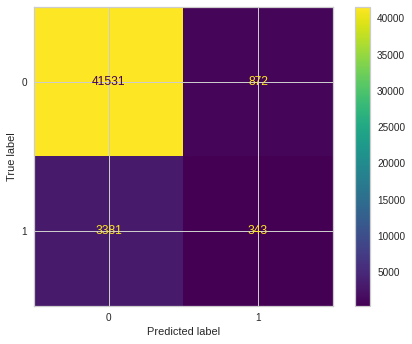

In [ ]:
#Print confusion matrix
cm_stack_test_data3 = confusion_matrix(X_test_data3["TARGET"], predict_stack_test_data3["Label"])  
disp = ConfusionMatrixDisplay(confusion_matrix=cm_stack_test_data3)
disp.plot()

Observations and conclusion
* Overfitting is observed with substantial difference in accuracy & AUC values between predictions on train data and test data.
* Accuracy and AUC have decreased compared to best_model.
Based on the above observations, it is concluded that stacker is not better than best_model.

## 5.3 Neural Network

In [ ]:
#Define the keras model
NN_model = Sequential()
NN_model.add(Dense(128, input_dim=180, activation='relu'))
NN_model.add(Dropout(0.5))
NN_model.add(BatchNormalization())
NN_model.add(Dense(64, activation='relu'))
NN_model.add(Dropout(0.5))
NN_model.add(BatchNormalization())
NN_model.add(Dense(32, activation='relu'))
NN_model.add(Dropout(0.5))
NN_model.add(BatchNormalization())
NN_model.add(Dense(1, activation='sigmoid'))
#Compile the keras model
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#Fit the keras model on the dataset
NN_model.fit(X_train_data3.drop(columns=['TARGET']), X_train_data3['TARGET'], epochs=25, batch_size=1024)

Epoch 1/25
200/200 [==============================] - 7s 23ms/step - loss: 0.5694 - accuracy: 0.7603
Epoch 2/25
200/200 [==============================] - 4s 22ms/step - loss: 0.3112 - accuracy: 0.9074
Epoch 3/25
200/200 [==============================] - 5s 23ms/step - loss: 0.2752 - accuracy: 0.9148
Epoch 4/25
200/200 [==============================] - 4s 20ms/step - loss: 0.2649 - accuracy: 0.9156
Epoch 5/25
200/200 [==============================] - 3s 17ms/step - loss: 0.2572 - accuracy: 0.9166
Epoch 6/25
200/200 [==============================] - 3s 16ms/step - loss: 0.2508 - accuracy: 0.9169
Epoch 7/25
200/200 [==============================] - 3s 16ms/step - loss: 0.2431 - accuracy: 0.9173
Epoch 8/25
200/200 [==============================] - 3s 15ms/step - loss: 0.2326 - accuracy: 0.9188
Epoch 9/25
200/200 [==============================] - 3s 15ms/step - loss: 0.2237 - accuracy: 0.9197
Epoch 10/25
200/200 [==============================] - 3s 15ms/step - loss: 0.2178 - accura

In [ ]:
#Print model parameters
print(NN_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               23168     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_5 (Batc  (None, 64)               256       
 hNormalization)                                      

Accuracy on train data:  92.54
Accuracy on test data:  91.67


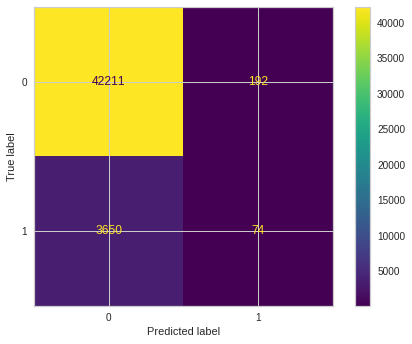

In [ ]:
#Print accuracy on training data
NN_pred_X_train = (NN_model.predict(X_train_data3.drop(columns=['TARGET'])) > 0.5).astype(int)
print("Accuracy on train data: ", np.around(accuracy_score(X_train_data3['TARGET'], NN_pred_X_train)*100, 2))

#Print confusion matrix
NN_pred_X_test = (NN_model.predict(X_test_data3.drop(columns=['TARGET'])) > 0.5).astype(int)
cm_NN_test_data3 = confusion_matrix(X_test_data3["TARGET"], NN_pred_X_test)  
disp = ConfusionMatrixDisplay(confusion_matrix=cm_NN_test_data3)
disp.plot()

#Print accuracy on test data
print("Accuracy on test data: ", np.around(accuracy_score(X_test_data3['TARGET'], NN_pred_X_test)*100, 2))

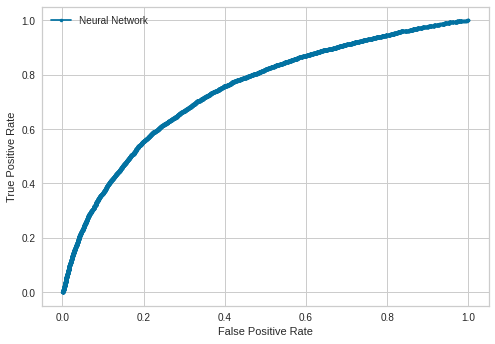

ROC AUC on test data:  0.74


In [ ]:
#Plot AUC (area under curve) for ROC (receiver operating characteristic) curve and print value
probabilities = NN_model.predict(X_test_data3.drop(columns=['TARGET']))
fpr, tpr, _ = roc_curve(X_test_data3['TARGET'], probabilities)
plt.plot(fpr, tpr, marker='.', label='Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print("ROC AUC on test data: ", np.around(roc_auc_score(X_test_data3['TARGET'], probabilities), 2))

Observations and conclusion
* Overfitting is observed although not major.
* Accuracy and AUC have decreased compared to best_model.
Based on the above observations, it is concluded that NN_model is not better than best_model.

## 5.4 Neural Network for original data (without additional features)

In [ ]:
#Define the keras model
model_feature_selected = Sequential()
model_feature_selected.add(Dense(256, input_dim=176, activation='relu'))
model_feature_selected.add(Dropout(0.5))
model_feature_selected.add(BatchNormalization())
model_feature_selected.add(Dense(128, activation='relu'))
model_feature_selected.add(Dropout(0.5))
model_feature_selected.add(BatchNormalization())
model_feature_selected.add(Dense(64, activation='relu'))
model_feature_selected.add(Dropout(0.5))
model_feature_selected.add(BatchNormalization())
model_feature_selected.add(Dense(32, activation='relu'))
model_feature_selected.add(Dropout(0.5))
model_feature_selected.add(BatchNormalization())
model_feature_selected.add(Dense(1, activation='sigmoid'))
#Compile the keras model
model_feature_selected.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#Fit the keras model on the dataset
model_feature_selected.fit(X_train_feature_selected.drop(columns=['TARGET']), y_train_feature_selected, epochs=25, batch_size=1024)

Epoch 1/25
200/200 [==============================] - 12s 49ms/step - loss: 0.5594 - accuracy: 0.7654
Epoch 2/25
200/200 [==============================] - 9s 45ms/step - loss: 0.3036 - accuracy: 0.9136
Epoch 3/25
200/200 [==============================] - 7s 33ms/step - loss: 0.2730 - accuracy: 0.9161
Epoch 4/25
200/200 [==============================] - 6s 29ms/step - loss: 0.2649 - accuracy: 0.9171
Epoch 5/25
200/200 [==============================] - 6s 29ms/step - loss: 0.2610 - accuracy: 0.9171
Epoch 6/25
200/200 [==============================] - 6s 29ms/step - loss: 0.2589 - accuracy: 0.9175
Epoch 7/25
200/200 [==============================] - 6s 29ms/step - loss: 0.2567 - accuracy: 0.9177
Epoch 8/25
200/200 [==============================] - 6s 29ms/step - loss: 0.2557 - accuracy: 0.9177
Epoch 9/25
200/200 [==============================] - 6s 29ms/step - loss: 0.2541 - accuracy: 0.9179
Epoch 10/25
200/200 [==============================] - 6s 29ms/step - loss: 0.2531 - accur

In [ ]:
#Print model parameters
print(model_feature_selected.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 256)               45312     
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_13 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 batch_normalization_14 (Bat  (None, 128)              512       
 chNormalization)                                     

Accuracy on train data:  91.85
Accuracy on test data:  91.94


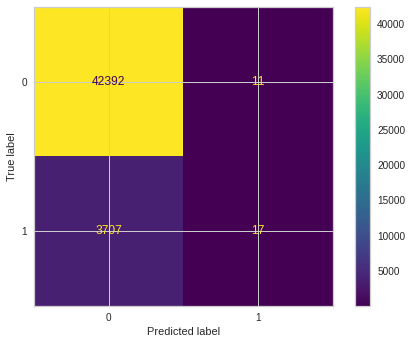

In [ ]:
#Print accuracy on training data
NN_pred_y_train_feature_selected = (model_feature_selected.predict(X_train_feature_selected.drop(columns=['TARGET'])) > 0.5).astype(int)
print("Accuracy on train data: ", np.around(accuracy_score(y_train_feature_selected, NN_pred_y_train_feature_selected)*100, 2))

#Print confusion matrix
NN_pred_y_test_feature_selected = (model_feature_selected.predict(X_test_feature_selected.drop(columns=['TARGET'])) > 0.5).astype(int)
NN_cm_feature_selected = confusion_matrix(y_test_feature_selected, NN_pred_y_test_feature_selected)
disp = ConfusionMatrixDisplay(confusion_matrix=NN_cm_feature_selected)
disp.plot()

#Print accuracy on test data
print("Accuracy on test data: ", np.around(accuracy_score(y_test_feature_selected, NN_pred_y_test_feature_selected)*100, 2))

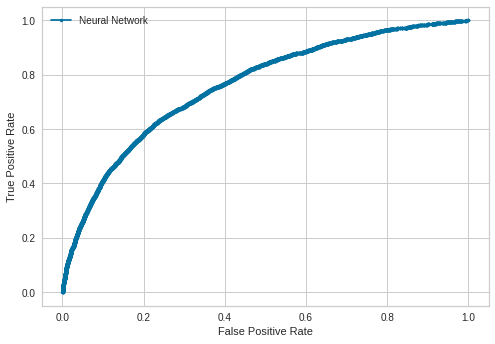

ROC AUC on test data:  0.76


In [ ]:
#Plot AUC (area under curve) for ROC (receiver operating characteristic) curve and print value
probabilities = model_feature_selected.predict(X_test_feature_selected.drop(columns=['TARGET']))
fpr, tpr, _ = roc_curve(y_test_feature_selected, probabilities)
plt.plot(fpr, tpr, marker='.', label='Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print("ROC AUC on test data: ", np.around(roc_auc_score(y_test_feature_selected, probabilities), 2))

Observations and conclusion:
* Overfitting is not observed.
* Accuracy and AUC have decreased only slightly compared to best_model.
* The number of people who should have been rejected for loan but are predicted as eligible for loan is huge.
Based on the above observations, it is concluded that model_feature_selected is not better than best_model.

# 6.0 Conclusion

* After trying so many models with so many different conditions (across phase 3 and phase 4), it is observed that tuned lightgbm is the best performer. Even deep learning models fare poorly as compared to tuned lightgbm. Also best results are obtained on feature selected data.
* Many permutations and combinations are applied to reach this conclusion. However, more approaches can be tried which may or may not give better results. Such approaches can be tried with availability of time and resources. 
* This phase concludes the model training step. Further the trained model shall be deployed in the coming phase.
